In [2]:
from google.colab import drive
drive.mount('/gdrive/')
%cd /gdrive

Mounted at /gdrive/
/gdrive


In [3]:
ls

MyDrive/  Shareddrives/


In [4]:
cd /gdrive/MyDrive/drug_type_detection

/gdrive/MyDrive/drug_type_detection


In [5]:
ls

drug.csv


# Importing Libraries

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")
import joblib

# Uploading Dataset

In [8]:
df_train=pd.read_csv('drug.csv')
df_train.head()

,age,sex,bp,cholesterol,Na_to_K,drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          200 non-null    int64  
 1   sex          200 non-null    object 
 2   bp           200 non-null    object 
 3   cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [10]:
df_train.describe().style.background_gradient(axis=0,cmap = 'RdYlGn')

,age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


# EDA

In [11]:
df_train.isna().sum()

age            0
sex            0
bp             0
cholesterol    0
Na_to_K        0
drug           0
dtype: int64

In [12]:
df_train.columns

Index(['age', 'sex', 'bp', 'cholesterol', 'Na_to_K', 'drug'], dtype='object')

In [13]:
df_train.drug.value_counts()

drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: drug, dtype: int64

In [14]:
columns = df_train.columns
binary_cols = []
remain_cols=[]
for col in columns:
    if df_train[col].value_counts().shape[0] == 2:
        binary_cols.append(col)
    else:
      remain_cols.append(col)

In [15]:
binary_cols

['sex', 'cholesterol']

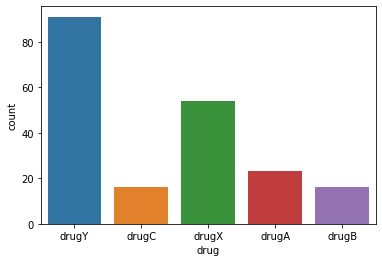

In [16]:
sns.countplot("drug", data=df_train)

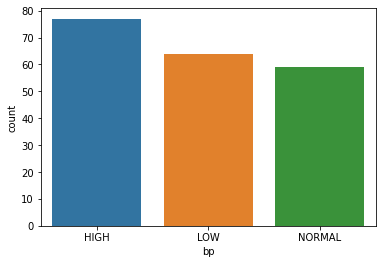

In [17]:
sns.countplot("bp", data=df_train)

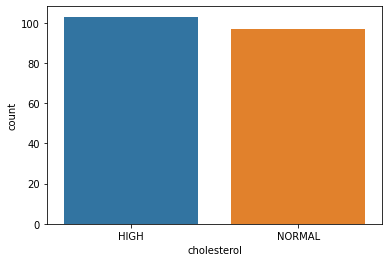

In [20]:
sns.countplot("cholesterol", data=df_train)

In [19]:
drug_numeric = {'drugB':4,'drugA':3,'drugX':2, 'drugC':1,'drugY':0}
df_train.drug.replace(drug_numeric, inplace=True)

In [21]:
bp_numeric = {'HIGH':2, 'LOW':1,'NORMAL':0}
df_train.bp.replace(bp_numeric, inplace=True)

In [22]:
sex_numeric = {'F':1,'M':0}
df_train.sex.replace(sex_numeric, inplace=True)

In [23]:
cholesterol_numeric = { 'HIGH':1,'NORMAL':0}
df_train.cholesterol.replace(cholesterol_numeric, inplace=True)

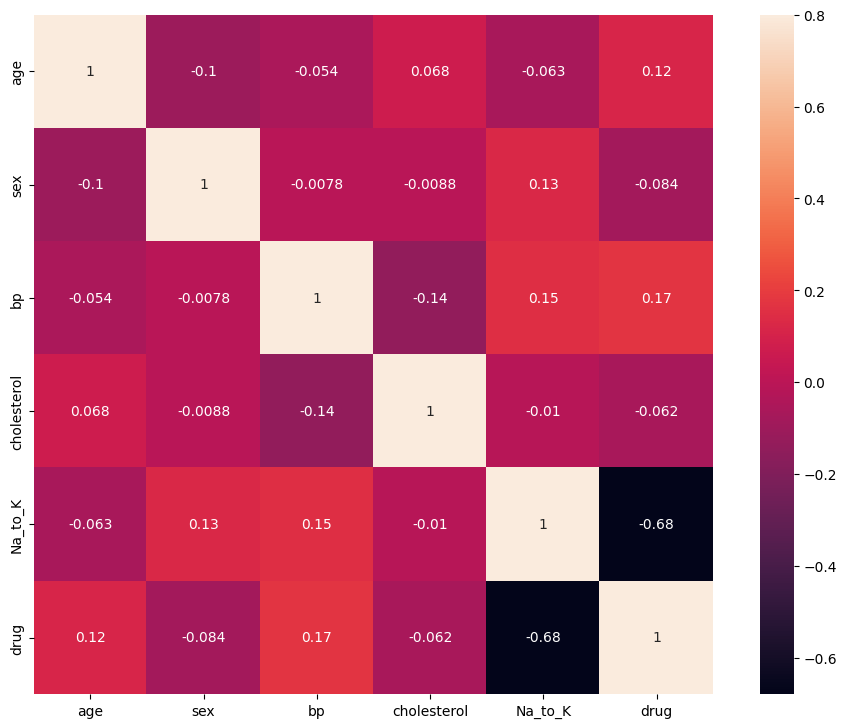

In [24]:
plt.figure(figsize=(12,9),dpi = 100)
sns.heatmap(df_train.corr(),vmax=.8,annot = True, square = True)
plt.show()

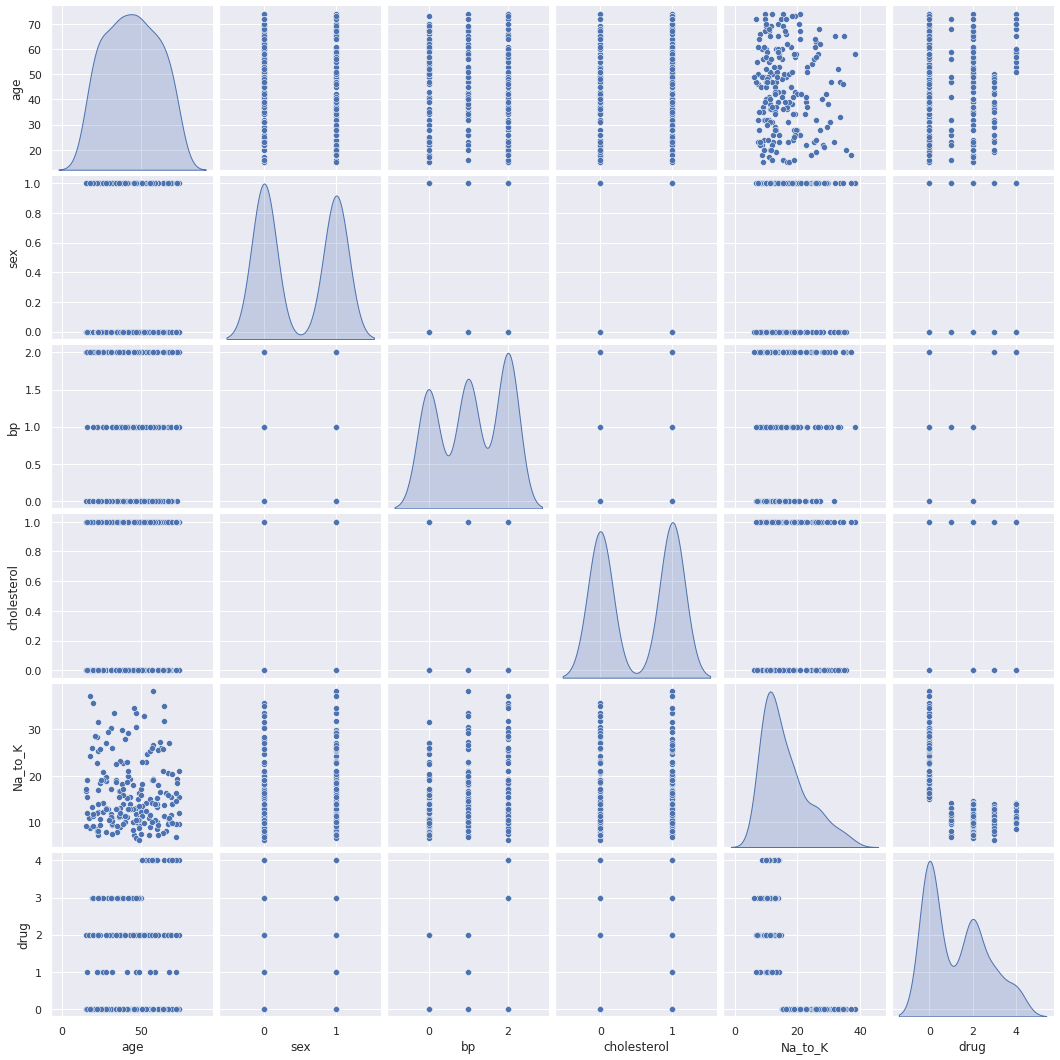

In [25]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
cData_attr = df_train.iloc[:, 0:7]
sns.pairplot(cData_attr, diag_kind='kde')   

In [26]:

X = df_train.drop(['drug'], axis = 1)
Y = df_train["drug"]
x_Data = X.values
y_Data = Y.values

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(x_Data, y_Data, test_size = 0.2, random_state = 42)

# Naive Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train,y_train)

GaussianNB()

In [30]:
model.score(X_test,y_test)

0.925

In [31]:
from sklearn.model_selection import cross_val_score
print(cross_val_score(GaussianNB(),X_train, y_train, cv=5))

[0.84375 0.9375  0.84375 0.78125 0.84375]


In [32]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [33]:
pred = model.predict(X_train) 
accuracy_score(y_train, pred)

0.84375

In [34]:
confusion_matrix(y_train, pred)

array([[54,  9,  2,  7,  4],
       [ 0, 11,  0,  0,  0],
       [ 2,  0, 41,  0,  0],
       [ 0,  0,  0, 17,  0],
       [ 0,  0,  0,  1, 12]])

In [35]:
predicted_test = model.predict(X_test)
p=accuracy_score(y_test, predicted_test)

In [36]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [37]:
print(classification_report(y_test, predicted_test))

              precision    recall  f1-score   support

           0       1.00      0.80      0.89        15
           1       0.83      1.00      0.91         5
           2       1.00      1.00      1.00        11
           3       0.86      1.00      0.92         6
           4       0.75      1.00      0.86         3

    accuracy                           0.93        40
   macro avg       0.89      0.96      0.92        40
weighted avg       0.94      0.93      0.92        40



In [38]:
cma = confusion_matrix(y_test, predicted_test)

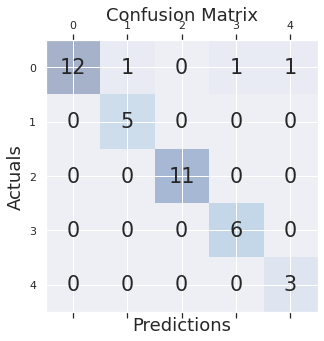

In [39]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Random forest Classifier

In [40]:
from sklearn.ensemble import RandomForestClassifier as rf

In [41]:
clf_forest = rf(n_estimators=100, max_depth=10)
clf_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [42]:
pred = clf_forest.predict(X_train)
accuracy_score(y_train, pred)

1.0

In [43]:
confusion_matrix(y_train, pred)

array([[76,  0,  0,  0,  0],
       [ 0, 11,  0,  0,  0],
       [ 0,  0, 43,  0,  0],
       [ 0,  0,  0, 17,  0],
       [ 0,  0,  0,  0, 13]])

In [44]:
pred_test = clf_forest.predict(X_test)
q=accuracy_score(y_test, pred_test)

In [45]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score

In [46]:
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         3

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [47]:
cma = confusion_matrix(y_test, pred_test)

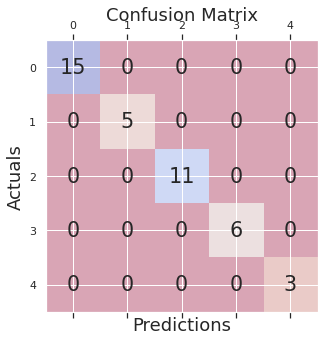

In [48]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="coolwarm_r", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Decision Tree Classifier

In [49]:
from sklearn import tree

In [50]:
 clf = tree.DecisionTreeClassifier()
 clf = clf.fit(X_train, y_train)

In [51]:
pred1 = clf.predict(X_train)
accuracy_score(y_train, pred1)

1.0

In [52]:
confusion_matrix(y_train, pred1)

array([[76,  0,  0,  0,  0],
       [ 0, 11,  0,  0,  0],
       [ 0,  0, 43,  0,  0],
       [ 0,  0,  0, 17,  0],
       [ 0,  0,  0,  0, 13]])

In [53]:
pred1_test = clf.predict(X_test)
r=accuracy_score(y_test, pred1_test)

In [54]:
print(classification_report(y_test, pred1_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      1.00      1.00         5
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         3

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40



In [55]:
cma = confusion_matrix(y_test, pred1_test)

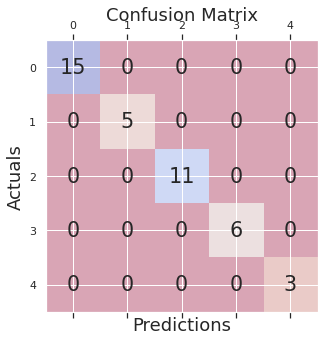

In [56]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="coolwarm_r", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression  
clf1= LogisticRegression(random_state=0)  
clf1.fit(X_train, y_train)  

LogisticRegression(random_state=0)

In [58]:
pred_LR= clf1.predict(X_train)
accuracy_score(y_train, pred_LR)

0.91875

In [59]:
confusion_matrix(y_train, pred_LR)

array([[75,  0,  0,  0,  1],
       [ 3,  5,  2,  0,  1],
       [ 5,  0, 38,  0,  0],
       [ 0,  0,  0, 16,  1],
       [ 0,  0,  0,  0, 13]])

In [60]:
pred_LR_test = clf1.predict(X_test)
s=accuracy_score(y_test, pred_LR_test)

In [61]:
print(classification_report(y_test, pred_LR_test))

              precision    recall  f1-score   support

           0       0.88      0.93      0.90        15
           1       1.00      0.40      0.57         5
           2       0.83      0.91      0.87        11
           3       0.86      1.00      0.92         6
           4       1.00      1.00      1.00         3

    accuracy                           0.88        40
   macro avg       0.91      0.85      0.85        40
weighted avg       0.89      0.88      0.86        40



In [62]:
cma = confusion_matrix(y_test, pred_LR_test)

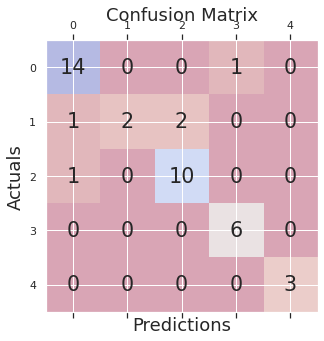

In [63]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="coolwarm_r", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Neural networks

In [64]:
from sklearn.neural_network import MLPClassifier

In [65]:
clf2= MLPClassifier(solver='lbfgs', alpha=1e-5,
           hidden_layer_sizes=(5, 2), random_state=1)
clf2.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [66]:
pred_NN= clf2.predict(X_train)
accuracy_score(y_train, pred_NN)

0.475

In [67]:
confusion_matrix(y_train, pred_NN)

array([[76,  0,  0,  0,  0],
       [11,  0,  0,  0,  0],
       [43,  0,  0,  0,  0],
       [17,  0,  0,  0,  0],
       [13,  0,  0,  0,  0]])

In [68]:
pred_NN_test = clf2.predict(X_test)
u=accuracy_score(y_test, pred_NN_test)

In [69]:
print(classification_report(y_test, pred_NN_test))

              precision    recall  f1-score   support

           0       0.38      1.00      0.55        15
           1       0.00      0.00      0.00         5
           2       0.00      0.00      0.00        11
           3       0.00      0.00      0.00         6
           4       0.00      0.00      0.00         3

    accuracy                           0.38        40
   macro avg       0.07      0.20      0.11        40
weighted avg       0.14      0.38      0.20        40



In [70]:
cma = confusion_matrix(y_test, pred_NN_test)

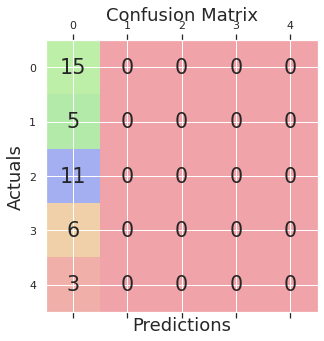

In [71]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="prism", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# XGBOOST

In [72]:
import xgboost as xgb

In [73]:
xgb = xgb.XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(objective='multi:softprob')

In [74]:
pred_XGB= xgb.predict(X_train)
accuracy_score(y_train, pred_XGB)

1.0

In [75]:
confusion_matrix(y_train, pred_XGB)

array([[76,  0,  0,  0,  0],
       [ 0, 11,  0,  0,  0],
       [ 0,  0, 43,  0,  0],
       [ 0,  0,  0, 17,  0],
       [ 0,  0,  0,  0, 13]])

In [76]:
pred_XGB_test = xgb.predict(X_test)
v=accuracy_score(y_test, pred_XGB_test)

In [77]:
print(classification_report(y_test, pred_XGB_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        15
           1       1.00      0.80      0.89         5
           2       0.92      1.00      0.96        11
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         3

    accuracy                           0.97        40
   macro avg       0.98      0.96      0.97        40
weighted avg       0.98      0.97      0.97        40



In [78]:
cma = confusion_matrix(y_test, pred_XGB_test)

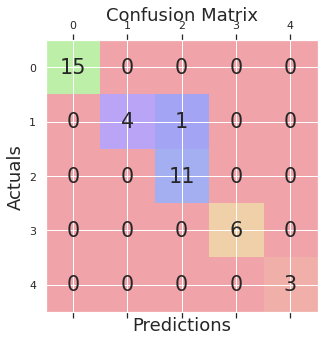

In [79]:
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cma, cmap ="prism", alpha=0.3)
for i in range(cma.shape[0]):
    for j in range(cma.shape[1]):
        ax.text(x=j, y=i,s=cma[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

# Comparative predicting

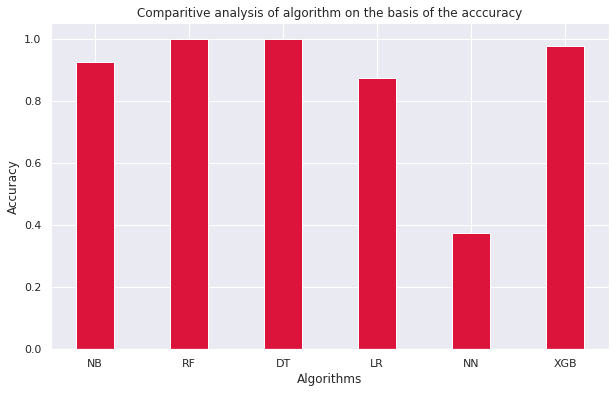

In [80]:
import numpy as np
import matplotlib.pyplot as plt
# creating the dataset
data = {'NB':p, 'RF':q, 'DT':r,'LR':s,'NN':u,'XGB':v}
courses = list(data.keys())
values = list(data.values())
fig = plt.figure(figsize = (10, 6))
# creating the bar plot
plt.bar(courses, values, color ='crimson',
		width = 0.4)
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.title("Comparitive analysis of algorithm on the basis of the acccuracy")
plt.show()


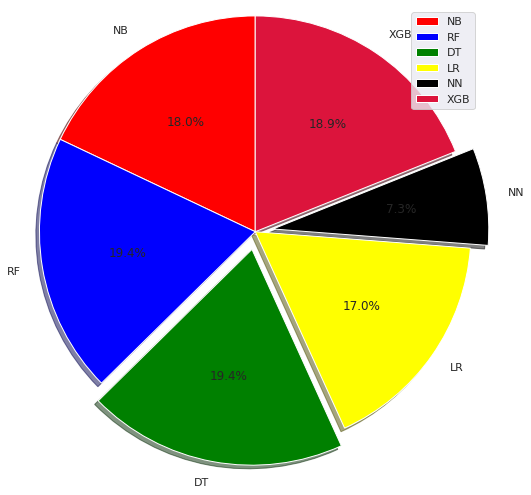

In [81]:
activities = ['NB', 'RF', 'DT', 'LR','NN','XGB'] 
# portion covered by each label
slices = [p,q,r,s,u,v]
 
# color for each label
colors = ['red', 'blue', 'green','yellow','black','crimson']
 
# plotting the pie chart
plt.pie(slices, labels = activities, colors=colors,
        startangle=90, shadow = True, explode = (0, 0, 0.1,0,0.1,0),
        radius = 1.2, autopct = '%1.1f%%')
 
# plotting legend
plt.legend()
 
# showing the plot
plt.show()

# Model saving

In [82]:
filename = 'naive_bayes.sav'
joblib.dump(model, filename)
filename1 = 'random_forest_Classifier.sav'
joblib.dump(clf_forest, filename1)
filename2 = 'decision_tree_classifier.sav'
joblib.dump(clf, filename2)
filename3 = 'logistic_regression.sav'
joblib.dump(clf1, filename3)
filename4 = 'neural_networks.sav'
joblib.dump(clf2, filename4)
filename5 = 'XGBOOST.sav'
joblib.dump(xgb, filename5)

['XGBOOST.sav']